# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import re
% matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

df_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
#twitter ne m'a pas permis d'avoir un compte développeur,
#je me permets de téléverser le fichier json/txt fourni par Udacity
json_data = []
with open('tweet_json.txt') as file:
    for line in file:
        json_data.append(json.loads(line))
#type(json_data)

In [5]:
df_api=pd.DataFrame(columns=['id', 'favorite_count', 'retweet_count'])
for i in range(len(json_data)):
    df_api.loc[i]=[json_data[i]['id'], json_data[i]['favorite_count'], json_data[i]['retweet_count']]

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## df_archive


### Problèmes de qualité

- il y a des retweets.
- Il y a des répliques à des tweets.
- de faux noms, tels que "a/an/the/quite".
- il manque certains noms et certains tweets ne contiennent pas de noms.
- denominateur différent de 10.
- Timestamp n'est pas en type datetime.
- il y a de fausses notes (comme 45)
- certaines notes sont floats, or le type est int

### Problèmes d'ordre

- doggo, floofer, pupper et puppo sont les valeurs d'une seule variable.
- rating_numerator et rating_denominator forment une seule variable.
- df_archive et df_api doivent former un seul tableau (observational unit).



In [6]:
# evaluer le tableau visuellement
# je constate le suivant :
#- il y a des retweets.
#- Il y a des répliques à des tweets.
#- de faux noms, tels que "a/an/the/quite".
#- il manque certains noms.
#- des denominateurs différent de 10.
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
#la colonne timestamp n'est pas de type datetime (retweeted_status_timestamp aussi
#mais les retweets ne nous intéressent pas)
#le reste est correct
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
df_archive.duplicated().sum()

0

In [9]:
# y a-t-il des tweets qui datent d'aprés le 1er Aout 2017 ?
df_archive.query('timestamp>="2017-08-02 00:00:00 +0000"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [10]:
# quelles sont les notes minimales et maximales ?
df_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [11]:
#il ne semble pas que certains tweets aux notes <10 soient celles de chiens
#ceci est vérifiable en comparant avec le tableau qui contient les images des tweets (df_predictions)
df_archive.query('rating_numerator==0').text[315]

"When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag"

In [12]:
#selon le contexte, on s'attend pas à ce qu'il y ait des notes inférieures à 10
#parce que "they're good dogs brent"
df_archive.query('rating_numerator<10 and in_reply_to_status_id=="NaN" and retweeted_status_id=="NaN"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882...,5,10,None,None,None,None,None
765,777885040357281792,NaN,NaN,2016-09-19 15:00:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wesley. He's clearly trespassing. Seem...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/777885040...,3,10,Wesley,None,None,None,None
814,771014301343748096,NaN,NaN,2016-08-31 15:58:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Another pic without a dog in it? What am I sup...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771014301...,7,10,None,None,None,None,None
835,768193404517830656,NaN,NaN,2016-08-23 21:09:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Gerald. He's a fairly exotic doggo. Floof...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768193404...,8,10,Gerald,doggo,None,None,None
845,766423258543644672,NaN,NaN,2016-08-18 23:55:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shadoe. Her tongue flies out of her mo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766423258...,9,10,Shadoe,None,None,None,None
859,763183847194451968,NaN,NaN,2016-08-10 01:23:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He collects teddy bears. It's a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/763183847...,8,10,Clark,None,None,None,None
883,760252756032651264,NaN,NaN,2016-08-01 23:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fido. He can tell the weather. Not goo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760252756...,4,10,Fido,None,None,None,None


In [13]:
#certaines notes sont fausses, et elles sont des réels, or la colonne ne contient que des entiers et est de type int.
df_archive.iloc[45].text

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

In [14]:
# y a-t-il d'autres notes qui sont avec une virgule ?
df_archive.query('text.str.match(".*[.\s]*(\d+[.]\d+)[/]\d.*")', engine='python')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


In [15]:
#combien y a-t-il de notes réelles ?
df_archive.text.str.match('.*[.\s]*(\d+[.]\d+)[/]\d.*').sum()

6

In [16]:
# pourquoi y a-t-il des notes trop élevées ?
df_archive.query('rating_numerator>50 and in_reply_to_status_id=="NaN" and retweeted_status_id=="NaN"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None


In [17]:
#il se confirme que le rating_numerator doit être corriger et converti de types int dans certains cas
df_archive.iloc[695].text

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [18]:
#est-ce une erreur que le dénominateur est des fois différent de 10 ?
print(df_archive.iloc[433].text,'\n',
      df_archive.iloc[902].text,'\n',
      df_archive.iloc[1635].text,'\n',
      df_archive.iloc[1779].text)

The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd 
 Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE 
 Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55 
 IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq


In [19]:
##verifier programatiquement que les noms extraits correspondent aux contenues des textes
name_series=[]
for index in df_archive.index:
    name_series.append((df_archive.name[index] not in df_archive.text[index]) and (df_archive.name[index]!="None"))
df_archive.loc[name_series]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [20]:
# les noms valides des noms semblent tous commencer par une lettre capitale
# explorer ceci pour évaluer les noms non-valides
df_archive.query('name.str.contains(r"^[a-z]")', engine='python').name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [21]:
# est-ce que tous les tweets contenant un nom contiennent une note ?
name_score=[]
for index in df_archive.index:
    name_score.append((df_archive.name[index] in df_archive.text[index])
                       and (df_archive.rating_numerator[index].astype('str') in df_archive.text[index]))

df_archive.loc[name_score]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None
11,889880896479866881,NaN,NaN,2017-07-25 16:11:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,None,None,None,None


## df_predictions

### Problèmes de qualité

- les noms des colonnes ne sont pas compréhensibles.
- pas toutes les images sont de chiens. 
- il y a uniquement 2075/2356 de tweets qui ont des images.

In [22]:
#on constate visuellement que :
#- les noms des colonnes ne sont pas compréhensibles.
#- pas toutes les images sont de chiens.
df_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [23]:
# il y a uniquement 2075/2356 de tweets qui ont des images.
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
# est-ce que toutes les images correspondent à des tweets dans df_archive ?
no_image=[]
for i in df_archive.tweet_id:
    if i not in list(df_predictions.tweet_id):
        no_image.append(i)
len(no_image)

281

In [25]:
# y a-t-il des images de tweets qui ne sont pas de chiens ?
tweets_list=list(df_archive.tweet_id)
df_predictions.query('(tweet_id in @tweets_list) and (p1_dog==False)', engine='python')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,2.784070e-01,True,groenendael,1.026430e-01,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,1.041090e-01,True,dingo,6.207120e-02,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,1.671750e-01,True,Chihuahua,8.695060e-02,True


## df_api

### Problèmes de qualité

- toutes les colonnes ne sont pas de types int64.
- le nom de la colonne id doit être tweet_id.
- il y a 2354/2356 de données avec nombre de favoris et de retweets.


### Problèmes d'ordre

- df_archive et df_api doivent former un seul tableau (observational unit).

In [26]:
# il est à constater que le nom de la colonne id doit être tweet_id.
df_api

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


In [27]:
# les types de données sont fausses (chaine de caractères au lieu d'entiers)
# et il y a 2354/2356 de données avec nombre de favoris et de retweets.
df_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null object
favorite_count    2354 non-null object
retweet_count     2354 non-null object
dtypes: object(3)
memory usage: 73.6+ KB


In [28]:
df_api.duplicated().sum()

0

In [29]:
# y a-t-il des tweets sans nombre de favoris et de retweets ?
retweets_list=list(df_api.id)
df_archive.query('tweet_id not in @retweets_list', engine='python')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
815,771004394259247104,NaN,NaN,2016-08-31 15:19:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @katieornah: @dog_rates learning a lot at c...,7.710021e+17,1.732729e+09,2016-08-31 15:10:07 +0000,https://twitter.com/katieornah/status/77100213...,12,10,None,None,None,pupper,None


## Quality issues

### df_archive

1. il y a des retweets.

2. Il y a des répliques à des tweets.

3. Timestamp n'est pas en type datetime.

4. pas tous les tweets ont des images.

5. il y a de fausses notes (comme à index == 45).

6. certaines notes sont floats, or le type est int.

7. denominateur différent de 10.

8. de faux noms, tels que "a/an/the/quite".

9. il manque certains noms et certains tweets ne contiennent pas de noms.

### df_predictions

10. les noms des colonnes ne sont pas compréhensibles.

11. pas toutes les images sont de chiens. 


### df_api

12. toutes les colonnes ne sont pas de types int64.

13. le nom de la colonne id doit être tweet_id.

14. il y a des tweets sans nombre de favoris et de retweets.

## Tidiness issues

### df_archive

1.  doggo, floofer, pupper et puppo sont les valeurs d'une seule variable.

2.  df_archive, df_api doivent et df_predictions forment un seul tableau (observational unit).

3.  rating_numerator et rating_denominator forment une seule variable.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [30]:
# Faire des copies des données originales
archive_clean = df_archive.copy()
predictions_clean = df_predictions.copy()
api_clean = df_api.copy()

# Quality issues

## df_archive

### 1. il y a des retweets.

#### Define:

1. Récupérer, dans une liste, les indices des retweets (ils sont identifiables par une valeur non-nulle de l'une des colonnes retweeted_status_id, retweeted_status_user_id ou retweeted_status_timestamp), puis utiliser la liste pour les supprimer via la fonction drop.
2. Supprimer les colonnes retweeted_status_id, retweeted_status_user_id ou retweeted_status_timestamp.
3. Réinitialiser les indices et supprimer les anciennes avec reset_index.

#### Code

In [31]:
retweets_ind = list(archive_clean.query('retweeted_status_id != "NaN"').index)
archive_clean = archive_clean.drop(index=retweets_ind).reset_index().drop(columns='index').copy()

In [32]:
archive_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

#### Test

In [33]:
#les retweets sont aussi identifiables par la chaine de caractères "RT @" dans les textes
archive_clean.query('text.str.contains("RT @")', engine='python')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [34]:
#les colonnes ont été en effet supprimées 
archive_clean.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1202,700890391244103680,NaN,NaN,2016-02-20 03:51:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chet. He's dapper af. His owners want ...,https://twitter.com/dog_rates/status/700890391...,11,10,Chet,None,None,None,None


In [35]:
#vérifier que les nouveaux indices sont corrects
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 238.0+ KB


### 2. Il y a des répliques à des tweets.

#### Define

1. Récupérer, dans une liste, les indices des répliques (ils sont identifiables par une valeur non-nulle de l'une des colonnes in_reply_to_status_id ou in_reply_to_user_id), puis utiliser la liste pour les supprimer via la fonction drop.
2. Supprimer les colonnes in_reply_to_status_id ou in_reply_to_user_id.
3. Réinitialiser les indices et supprimer les anciennes.

#### Code

In [36]:
replies_ind = list(archive_clean.query('in_reply_to_status_id != "NaN"').index)
archive_clean = archive_clean.drop(index=replies_ind).reset_index().drop(columns='index').copy()

#### Test

In [37]:
archive_clean.query('in_reply_to_status_id != "NaN"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [38]:
# il est nécessaire de faire le test avant de supprimer les colonnes
archive_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id'], inplace=True)
archive_clean.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1501,679511351870550016,2015-12-23 03:58:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to William. He makes fun of others b...,https://twitter.com/dog_rates/status/679511351...,7,10,William,None,None,None,None


In [39]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 196.7+ KB


### 3. Timestamp n'est pas en type datetime.

#### Define

- Convertir la colonne timestamp en type datetime.

#### Code

In [40]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean.timestamp)

#### Test

In [41]:
archive_clean.dtypes

tweet_id                       int64
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

### 4. pas tous les tweets ont des images.

#### Define

1. Récupérer les indices des tweets qui n'ont pas d'images dans df_predictions et les supprimer.
2. Réinitialiser les indices et supprimer les anciennes.


#### Code

In [42]:
no_image_ids = archive_clean.query('tweet_id in @no_image').index
archive_clean = archive_clean.drop(index=no_image_ids).reset_index().drop(columns='index').copy()

#### Test

In [43]:
archive_clean.query('tweet_id in @no_image')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [44]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 12 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 184.9+ KB


### 5. il y a de fausses notes & 6. certaines notes sont floats, or le type est int.

#### Define

1. Re-extraire toutes les notes des textes des tweets.
2. Convertir la colonne rating_numerator en type réel (float64)

#### Code

In [45]:
#print(archive_clean.query('text.str.match(".*[.\s]*(\d+[.]\d+)[/]\d.*")', engine='python').text[1359])
archive_clean['rating_numerator'] = archive_clean.text.str.extract(r'(\d+[.]?\d*)/10.*').astype('float64')

#### Test

In [46]:
archive_clean.query('text.str.match(r".*[.\s]*\d+[.]\d+/10.*")', engine='python')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
39,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.50,10,Bella,None,None,None,None
499,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None,None,None,None
549,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,None,None,pupper,None
1359,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,None,None,None,None


In [47]:
#les valeurs manquantes du rating_numerator sont dus aux scores qui ne sont pas sur 10
#ceux là seront traités aprés
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 12 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1959 non-null float64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 184.9+ KB


### 7. denominateur différent de 10.

#### Define

Normaliser toutes les notes sur 10, en convertissant les notes != 10 comme suit: a/b=a/b*(10/10)=(a*10/b)/10.
1. Extraire les numérateurs et dénominateurs en question et remplacer les premiers selon la formule précédente.
2. Remettre tous les denominateurs à 10.

#### Code

In [48]:
old_numerators_df = archive_clean.query('rating_denominator != 10 and rating_numerator == "NaN"')
new_numerators = old_numerators_df.text.str.extract(r'(\d+[.]?\d*)/\d+.*').astype('float64').squeeze()\
*10/old_numerators_df.rating_denominator.astype('float64')

old_numerators_index = list(old_numerators_df.index)
old_numerators_index

archive_clean.loc[old_numerators_index, 'rating_numerator'] = new_numerators

In [49]:
old_denominators_inds = archive_clean.loc[archive_clean.rating_denominator != 10, 'rating_denominator'].index
archive_clean.loc[old_denominators_inds, 'rating_denominator'] = np.full(len(old_denominators_inds),10)

#### Test

In [50]:
archive_clean.loc[old_numerators_index, 'rating_numerator']

320     12.000000
382     34.285714
658     11.000000
842     12.000000
939     11.000000
963     10.000000
981      9.000000
1045    12.000000
1120    11.000000
1288    11.000000
1420    12.000000
1478    11.000000
Name: rating_numerator, dtype: float64

In [51]:
archive_clean.query('rating_numerator == "NaN"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [52]:
archive_clean.loc[old_denominators_inds, 'rating_denominator']

320     10
382     10
658     10
794     10
842     10
884     10
918     10
939     10
963     10
981     10
1045    10
1120    10
1288    10
1313    10
1420    10
1478    10
1950    10
Name: rating_denominator, dtype: int64

In [53]:
archive_clean.query('rating_denominator != 10')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### 8. de faux noms, tels que "a/an/the/quite" & 9. il manque certains noms et certains tweets ne contiennent pas de noms.

#### Define

1. Faire une liste de tous les noms invalides et les indexes des lignes correspondantes.
2. Explorer les textes correspondants aux noms invalides pour essayer d'y identifier des phrases indicatifs d'un nom. Ces derniers s'avèrent être soit "name is"/"named"/"name of"/"names are" pour quelques lignes, des noms de profils instagrams des chiens, ou le texte ne mentionne pas le nom (dans ce cas, les valeurs sont mantenues à "None").
3. Recuperer les noms, suivant les phrases précédentes et profils IG, en utilisant "regular expressions".


#### Code

In [54]:
invalid_names = list(archive_clean.query('name.str.contains(r"^[a-z]")', engine='python').name.unique())
invalid_names.append('None')

invalid_names_ids = list(archive_clean.query('name in @invalid_names').index)

In [55]:
archive_clean.loc[invalid_names_ids]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,None,None,None,None,None
12,889665388333682689,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13.0,10,None,None,None,None,puppo
21,887517139158093824,2017-07-19 03:39:09,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14.0,10,such,None,None,None,None
23,887343217045368832,2017-07-18 16:08:03,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,https://twitter.com/dog_rates/status/887343217...,13.0,10,None,None,None,None,None
24,887101392804085760,2017-07-18 00:07:08,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,https://twitter.com/dog_rates/status/887101392...,12.0,10,None,None,None,None,None
32,885167619883638784,2017-07-12 16:03:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,https://twitter.com/dog_rates/status/885167619...,13.0,10,None,None,None,None,None
36,884441805382717440,2017-07-10 15:58:53,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",https://twitter.com/dog_rates/status/884441805...,14.0,10,None,None,None,None,None
41,883117836046086144,2017-07-07 00:17:54,"<a href=""http://twitter.com/download/iphone"" r...",Please only send dogs. We don't rate mechanics...,https://twitter.com/dog_rates/status/883117836...,13.0,10,None,None,None,None,None
49,881536004380872706,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14.0,10,a,None,None,pupper,None


In [56]:
archive_clean.loc[invalid_names_ids].query('text.str.contains(r"name")', engine='python')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
133,859607811541651456,2017-05-03 03:17:27,"<a href=""http://twitter.com/download/iphone"" r...",Sorry for the lack of posts today. I came home...,https://twitter.com/dog_rates/status/859607811...,13.0,10,None,None,None,None,puppo
618,765395769549590528,2016-08-16 03:52:26,"<a href=""http://twitter.com/download/iphone"" r...",This is my dog. Her name is Zoey. She knows I'...,https://twitter.com/dog_rates/status/765395769...,13.0,10,my,None,None,None,None
1327,682047327939461121,2015-12-30 03:55:29,"<a href=""http://twitter.com/download/iphone"" r...",We normally don't rate bears but this one seem...,https://twitter.com/dog_rates/status/682047327...,10.0,10,None,None,None,None,None
1380,679736210798047232,2015-12-23 18:51:56,"<a href=""http://twitter.com/download/iphone"" r...",This pup's name is Sabertooth (parents must be...,https://twitter.com/dog_rates/status/679736210...,9.0,10,None,None,None,None,None
1486,675706639471788032,2015-12-12 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sizzlin Menorah spaniel from Brookly...,https://twitter.com/dog_rates/status/675706639...,10.0,10,a,None,None,None,None
1579,673636718965334016,2015-12-06 22:54:44,"<a href=""http://twitter.com/download/iphone"" r...",This is a Lofted Aphrodisiac Terrier named Kip...,https://twitter.com/dog_rates/status/673636718...,10.0,10,a,None,None,None,None
1658,671743150407421952,2015-12-01 17:30:22,"<a href=""http://twitter.com/download/iphone"" r...",This is a Tuscaloosa Alcatraz named Jacob (Yac...,https://twitter.com/dog_rates/status/671743150...,11.0,10,a,None,None,None,None
1688,671147085991960577,2015-11-30 02:01:49,"<a href=""http://twitter.com/download/iphone"" r...",This is a Helvetica Listerine named Rufus. Thi...,https://twitter.com/dog_rates/status/671147085...,9.0,10,a,None,None,None,None
1708,670803562457407488,2015-11-29 03:16:46,"<a href=""http://twitter.com/download/iphone"" r...",I would do radical things in the name of Dog G...,https://twitter.com/dog_rates/status/670803562...,10.0,10,None,None,None,None,None
1738,670427002554466305,2015-11-28 02:20:27,"<a href=""http://twitter.com/download/iphone"" r...",This is a Deciduous Trimester mix named Spork....,https://twitter.com/dog_rates/status/670427002...,9.0,10,a,None,None,None,None


In [57]:
new_names1 = archive_clean.loc[invalid_names_ids].query('text.str.contains(r"name")', engine='python').text.str.extract(r".*[Nn]ame[d]?[s]?\si?s?a?r?e?o?f?\s?([A-Z][a-z]+)\s?.*").squeeze()
archive_clean.loc[list(new_names1.index), 'name'] = new_names1

In [58]:
new_names2 = archive_clean.loc[invalid_names_ids].query('text.str.contains(r"IG:")', engine='python').text.str.extract(r".*IG:\s(.*)[)].*").squeeze()
archive_clean.loc[list(new_names2.index), 'name'] = new_names2

In [59]:
invalid_names.remove('None')
unnamed = archive_clean.query('name in @invalid_names').name.squeeze()
archive_clean.loc[unnamed.index, 'name'] = np.full(len(unnamed), 'None')

#### Test

In [60]:
archive_clean.loc[list(new_names1.index), 'name']

133           Zoey
618           Zoey
1327          Thea
1380    Sabertooth
1486         Wylie
1579           Kip
1658         Jacob
1688         Rufus
1708           Dog
1738         Spork
1747      Cherokee
1750         Hemry
1768       Alphred
1782       Alfredo
1787          Zeus
1810         Leroi
1823         Berta
1836          Chuk
1845          Guss
1853       Alfonso
1867        Cheryl
1873       Jessiga
1880         Klint
1883           Big
1885       Tickles
1889          Kohl
1903         Daryl
1919          Pepe
1921         Cupit
1926     Octaviath
1929          Johm
Name: name, dtype: object

In [61]:
archive_clean.loc[list(new_names2.index), 'name']

5          tucker_marlo
21         roxy.thedoxy
23           emmylouroo
36    itselizabethgales
49      puffie_the_chow
Name: name, dtype: object

In [62]:
len(archive_clean.query('name in @invalid_names'))

0

In [63]:
archive_clean.loc[unnamed.index, 'name'].unique()

array(['None'], dtype=object)

In [64]:
archive_clean.query('name in @invalid_names')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [65]:
len(archive_clean.query('name == "None"'))

586

In [66]:
archive_clean.query('name.str.match(r"^[a-z].*")', engine='python')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,tucker_marlo,None,None,None,None
21,887517139158093824,2017-07-19 03:39:09,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14.0,10,roxy.thedoxy,None,None,None,None
23,887343217045368832,2017-07-18 16:08:03,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,https://twitter.com/dog_rates/status/887343217...,13.0,10,emmylouroo,None,None,None,None
36,884441805382717440,2017-07-10 15:58:53,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",https://twitter.com/dog_rates/status/884441805...,14.0,10,itselizabethgales,None,None,None,None
49,881536004380872706,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14.0,10,puffie_the_chow,None,None,pupper,None


In [67]:
archive_clean['name'] = archive_clean.name.str.capitalize()

In [68]:
archive_clean.query('name.str.match(r"^[a-z].*")', engine='python')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


## df_predictions


### 10. les noms des colonnes ne sont pas compréhensibles.

#### Define

Renommer les colonnes avec des noms plus suggestifs.

#### Code

In [69]:
predictions_clean.rename(columns={'jpg_url':'image_url',
                                  'img_num':'image_number',
                                  'p1':'prediction1',
                                 'p1_conf':'prediction1_confidence',
                                 'p1_dog':'dog_or_not1',
                                 'p2':'prediction2',
                                 'p2_conf':'prediction2_confidence',
                                 'p2_dog':'dog_or_not2',
                                 'p3':'prediction3',
                                 'p3_conf':'prediction3_confidence',
                                 'p3_dog':'dog_or_not3'}, inplace=True)

#### Test

In [70]:
predictions_clean.sample()

,tweet_id,image_url,image_number,prediction1,prediction1_confidence,dog_or_not1,prediction2,prediction2_confidence,dog_or_not2,prediction3,prediction3_confidence,dog_or_not3
157,668852170888998912,https://pbs.twimg.com/media/CUg9gBvWoAAmx-2.jpg,1,golden_retriever,0.903529,True,Tibetan_mastiff,0.041497,True,kuvasz,0.0225,True


### 11. pas toutes les images sont de chiens. 

#### Define

1. Extraire les indices des images qui n'ont pas été associés à des chiens par l'algorithme et supprimer les lignes correspondantes.

2. Comparer les données retenues au tableau archive_clean pour en supprimer les tweets qui ne sont pas associés à des chiens.

#### Code

In [71]:
no_dog_inds = list(predictions_clean.query('dog_or_not1==False').index)

In [72]:
predictions_clean = predictions_clean.drop(index=no_dog_inds).reset_index().drop(columns='index').copy()

In [73]:
predictions_clean.shape[0], archive_clean.shape[0]

(1532, 1971)

In [74]:
no_dog_image = []
for i in archive_clean.tweet_id:
    if i not in list(predictions_clean.tweet_id):
        no_dog_image.append(i)
        
no_dog_image_inds = archive_clean.query('tweet_id in @no_dog_image').index

In [75]:
archive_clean = archive_clean.drop(index=no_dog_image_inds).reset_index().drop(columns='index').copy()

#### Test

In [76]:
predictions_clean.query('dog_or_not1 ==False and prediction1_confidence > 0.6')

,tweet_id,image_url,image_number,prediction1,prediction1_confidence,dog_or_not1,prediction2,prediction2_confidence,dog_or_not2,prediction3,prediction3_confidence,dog_or_not3


In [77]:
predictions_clean.query('tweet_id in @no_dog_image')

,tweet_id,image_url,image_number,prediction1,prediction1_confidence,dog_or_not1,prediction2,prediction2_confidence,dog_or_not2,prediction3,prediction3_confidence,dog_or_not3


In [78]:
archive_clean.query('tweet_id in @no_dog_image')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [79]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null object
favorite_count    2354 non-null object
retweet_count     2354 non-null object
dtypes: object(3)
memory usage: 73.6+ KB


## df_api


### 12. toutes les colonnes ne sont pas de types int64.

#### Define

Convertir toutes les colonnes en type int64


#### Code

In [80]:
api_clean = api_clean.astype('int64')

#### Test

In [81]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 73.6 KB


### 13.  le nom de la colonne id doit être tweet_id.

#### Define

Changer le nom de la colonne id en tweet_id

#### Code

In [82]:
api_clean.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test

In [83]:
api_clean.sample()

,tweet_id,favorite_count,retweet_count
1177,719367763014393856,3022,827


### 14. il y a des tweets sans nombre de favoris et de retweets.

#### Define

Le problème maintenant (comme le montre les trois premiers lignes de code en dessous) est le fait qu'il y a données de favoris et retweets qui ne correspondent pas à un tweet.

- Extraire les indices des nombre de favoris et retweets sans tweets et les supprimer.


#### Code

In [84]:
api_clean.shape[0], archive_clean.shape[0]

(2354, 1463)

In [85]:
no_retweets = []

for i in archive_clean.tweet_id:
    if i not in list(api_clean.tweet_id):
        no_retweets_inds.append(i)

In [86]:
len(no_retweets)

0

In [87]:
no_tweets = []

for i in api_clean.tweet_id:
    if i not in list(archive_clean.tweet_id):
        no_tweets.append(i)

no_tweets_inds = api_clean.query('tweet_id in @no_tweets').index

In [88]:
api_clean = api_clean.drop(index=no_tweets_inds).reset_index().drop(columns='index').copy()

#### Test

In [89]:
api_clean.query('tweet_id in @no_tweets')

,tweet_id,favorite_count,retweet_count


# Tidiness issues


## df_archive

### 1.  doggo, floofer, pupper et puppo sont les valeurs d'une seule variable.

#### Define

1. Créer séparément une liste des indices des lignes avec une "phase" de chien enregistré, puis créer une nouvelle colonne "phase" et y introduire les valeurs doggo, floofer, pupper et puppo selon leurs liste d'indices dans l'emplacement approprié.

2. Supprimer les colonnes doggo, floofer, pupper et puppo.

#### Code

In [90]:
doggo_list = archive_clean.query('doggo=="doggo"').index
floofer_list = archive_clean.query('floofer=="floofer"').index
pupper_list = archive_clean.query('pupper=="pupper"').index
puppo_list = archive_clean.query('puppo=="puppo"').index

In [91]:
len(doggo_list)+len(floofer_list)+len(pupper_list)+len(puppo_list)

236

In [92]:
archive_clean.loc[doggo_list, 'phase'] = np.full(len(doggo_list), "doggo")
archive_clean.loc[floofer_list, 'phase'] = np.full(len(floofer_list), "floofer")
archive_clean.loc[pupper_list, 'phase'] = np.full(len(pupper_list), "pupper")
archive_clean.loc[puppo_list, 'phase'] = np.full(len(puppo_list), "puppo")
archive_clean.replace({'phase':{np.nan:'None'}}, inplace=True)

archive_clean.drop(columns=['doggo','floofer','pupper','puppo'], inplace=True)

#### Test

In [93]:
archive_clean.phase.unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [94]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1463 entries, 0 to 1462
Data columns (total 9 columns):
tweet_id              1463 non-null int64
timestamp             1463 non-null datetime64[ns]
source                1463 non-null object
text                  1463 non-null object
expanded_urls         1463 non-null object
rating_numerator      1463 non-null float64
rating_denominator    1463 non-null int64
name                  1463 non-null object
phase                 1463 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 102.9+ KB


### 2.  df_archive, df_api doivent et df_predictions forment un seul tableau (observational unit).

#### Define

Fusionner les deux tableaux archive_clean, api_clean et predictions_clean selon l'axe des tweet_id.

#### Code

In [95]:
archive_clean = pd.merge(archive_clean, api_clean, on='tweet_id', how='left')
archive_clean = pd.merge(archive_clean, predictions_clean, on='tweet_id', how='left')

#### Test

In [96]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1462
Data columns (total 22 columns):
tweet_id                  1463 non-null int64
timestamp                 1463 non-null datetime64[ns]
source                    1463 non-null object
text                      1463 non-null object
expanded_urls             1463 non-null object
rating_numerator          1463 non-null float64
rating_denominator        1463 non-null int64
name                      1463 non-null object
phase                     1463 non-null object
favorite_count            1463 non-null int64
retweet_count             1463 non-null int64
image_url                 1463 non-null object
image_number              1463 non-null int64
prediction1               1463 non-null object
prediction1_confidence    1463 non-null float64
dog_or_not1               1463 non-null bool
prediction2               1463 non-null object
prediction2_confidence    1463 non-null float64
dog_or_not2               1463 non-null boo

In [97]:
archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,phase,favorite_count,...,image_number,prediction1,prediction1_confidence,dog_or_not1,prediction2,prediction2_confidence,dog_or_not2,prediction3,prediction3_confidence,dog_or_not3
1081,679111216690831360,2015-12-22 01:28:25,"<a href=""http://twitter.com/download/iphone"" r...",This is officially the greatest yawn of all ti...,https://twitter.com/dog_rates/status/679111216...,12.0,10,None,None,6514,...,1,kelpie,0.189423,True,beagle,0.121988,True,basset,0.121171,True
661,733828123016450049,2016-05-21 01:13:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Terry. The harder you hug him the fart...,https://twitter.com/dog_rates/status/733828123...,10.0,10,Terry,None,3926,...,2,beagle,0.472324,True,Walker_hound,0.121779,True,Saint_Bernard,0.114640,True
1229,672968025906282496,2015-12-05 02:37:35,"<a href=""http://twitter.com/download/iphone"" r...",This is Gustaf. He's a purebred Chevy Equinox....,https://twitter.com/dog_rates/status/672968025...,11.0,10,Gustaf,None,1405,...,1,toy_poodle,0.678046,True,miniature_poodle,0.160273,True,Airedale,0.065649,True
435,779123168116150273,2016-09-23 01:00:13,"<a href=""http://twitter.com/download/iphone"" r...",This is Reggie. He hugs everyone he meets. 12/...,https://twitter.com/dog_rates/status/779123168...,12.0,10,Reggie,None,13206,...,1,toy_poodle,0.431080,True,soft-coated_wheaten_terrier,0.060365,True,cocker_spaniel,0.059845,True
32,884441805382717440,2017-07-10 15:58:53,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",https://twitter.com/dog_rates/status/884441805...,14.0,10,Itselizabethgales,None,27478,...,1,Pembroke,0.993225,True,Cardigan,0.003216,True,Chihuahua,0.002081,True


### 3.  rating_numerator et rating_denominator forment une seule variable.

Renommer la colonne rating_numerator en score_out_of10, indiquant le dénominateur commun des notes et supprimer la colonne rating_denominator qui devient farfelu.

#### Define


#### Code

In [98]:
archive_clean.rename(columns={'rating_numerator':'score_out_of10'}, inplace=True)
archive_clean.drop(columns='rating_denominator', inplace=True)

#### Test

In [99]:
archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,score_out_of10,name,phase,favorite_count,retweet_count,...,image_number,prediction1,prediction1_confidence,dog_or_not1,prediction2,prediction2_confidence,dog_or_not2,prediction3,prediction3_confidence,dog_or_not3
475,771102124360998913,2016-08-31 21:47:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He works for @TODAYshow. Supe...,https://twitter.com/dog_rates/status/771102124...,12.0,Charlie,None,6898,1663,...,1,Labrador_retriever,0.568789,True,pug,0.179918,True,Staffordshire_bullterrier,0.034437,True
1030,682662431982772225,2015-12-31 20:39:41,"<a href=""http://twitter.com/download/iphone"" r...",Meet Joey and Izzy. Joey only has one ear that...,https://twitter.com/dog_rates/status/682662431...,11.0,Joey,None,3326,1207,...,1,beagle,0.413824,True,Cardigan,0.263553,True,basset,0.167618,True
181,837366284874571778,2017-03-02 18:17:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She has a portrait of herself on...,https://twitter.com/dog_rates/status/837366284...,13.0,Lucy,None,23074,6005,...,1,American_Staffordshire_terrier,0.660085,True,Staffordshire_bullterrier,0.334947,True,dalmatian,0.002697,True
977,687109925361856513,2016-01-13 03:12:26,"<a href=""http://twitter.com/download/iphone"" r...",This is Baxter. He looks like a fun dog. Prefe...,https://twitter.com/dog_rates/status/687109925...,11.0,Baxter,None,6370,2803,...,2,borzoi,0.883086,True,whippet,0.022934,True,Saluki,0.021606,True
563,751132876104687617,2016-07-07 19:16:47,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He's just so damn happy. 10/10...,https://twitter.com/dog_rates/status/751132876...,10.0,Cooper,puppo,5610,1480,...,1,Labrador_retriever,0.929390,True,Chesapeake_Bay_retriever,0.038254,True,golden_retriever,0.007610,True


In [100]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1462
Data columns (total 21 columns):
tweet_id                  1463 non-null int64
timestamp                 1463 non-null datetime64[ns]
source                    1463 non-null object
text                      1463 non-null object
expanded_urls             1463 non-null object
score_out_of10            1463 non-null float64
name                      1463 non-null object
phase                     1463 non-null object
favorite_count            1463 non-null int64
retweet_count             1463 non-null int64
image_url                 1463 non-null object
image_number              1463 non-null int64
prediction1               1463 non-null object
prediction1_confidence    1463 non-null float64
dog_or_not1               1463 non-null bool
prediction2               1463 non-null object
prediction2_confidence    1463 non-null float64
dog_or_not2               1463 non-null bool
prediction3               1463 non-null obje

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [101]:
archive_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:

#### 1. Quelles sont les 10 chiens les mieux notées ?

Pour cela, je crée une nouvelle variable (final_score_by10) qui met ensemble le score, le nombre de favoris et le nombre de retweets. Ces deux derniers doivent d'abord être "normaliser" en les considérant comme des notes eux-mêmes (par leur max) et les convertir en notes/10 comme suit : a/max(a) = (a*10/max(a))/10, et je remplace a par (a*10/max(a)).

Pour la nouvelle variable qui attribue un score aux chiens compte tenus des réactions qu'ils ont suscitées, je prends la moyenne du score_out_of10, (favorite_count*10/max(favorite_count) et (retweet_count*10/max(retweet_count)). Ensuite, il faut ordonner les nouvelles valeurs et identifier à quels chiens ils appartiennent (je m'intéresse uniquement aux chiens avec noms).


In [102]:
archive_clean['favorites_score'] = archive_clean.favorite_count*10/archive_clean.favorite_count.max()
archive_clean['retweet_score'] = archive_clean.retweet_count*10/archive_clean.retweet_count.max()
archive_clean['final_score_by10'] = (archive_clean.score_out_of10+archive_clean.favorites_score+archive_clean.retweet_score)/3

In [103]:
# s'assurer que les nouvelles valeurs ne présentent aucune anomalie
archive_clean.final_score_by10.describe()

count    1463.000000
mean        3.996314
std         0.922783
min         0.935881
25%         3.431433
50%         3.923243
75%         4.459831
max        11.646709
Name: final_score_by10, dtype: float64

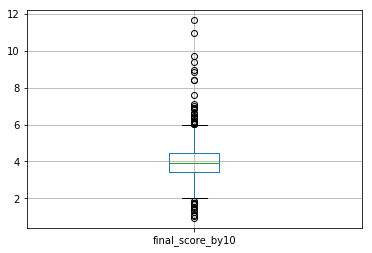

In [104]:
# apprécier les outliers
# suivant le contexte, je garde les notes > 10
archive_clean.boxplot('final_score_by10');

In [105]:
best_scores_inds = list(archive_clean.query('name != "None"').final_score_by10.sort_values(ascending=False)[:10].index)

In [106]:
archive_clean.loc[best_scores_inds, 'name']

310        Sam
324    Stephan
51     Duddles
267         Bo
95      Jamesy
82        Zoey
272      Buddy
213      Lilly
19      Canela
56         Aja
Name: name, dtype: object

#### 2. Quelles sont les races les mieux notées ?

Il suffit d'extraire les tweet_id des 10 chiens (avec ou sans nom enregistré) les mieux notés pour identifier les races correspondantes dans le tableau predictions_clean.

In [107]:
best_scores = list(archive_clean.final_score_by10.sort_values(ascending=False)[:10].index)

In [108]:
archive_clean.loc[best_scores].prediction1

310      golden_retriever
614    Labrador_retriever
247      Lakeland_terrier
324             Chihuahua
51       English_springer
267       standard_poodle
639            Eskimo_dog
95         French_bulldog
82       golden_retriever
272        cocker_spaniel
Name: prediction1, dtype: object

#### 3. A quelle phase les chiens sont-ils le plus appréciés ?

Là, je m'intéresse uniquement aux chiens avec "phase" enregistrée. Ils sont classés selon la moyenne de leur score finale (pour tenir compte des différentes proportions de chaque "phase").

In [109]:
archive_clean.query('phase != "None"').groupby(by='phase').mean().final_score_by10.sort_values(ascending=False)

phase
puppo      4.909762
doggo      4.841261
floofer    4.502463
pupper     3.974062
Name: final_score_by10, dtype: float64

### Visualization

Je prends 5 des 10 chiens (avec noms) les mieux notés et je visualise le nombre de favoris et de retweets de chacun.

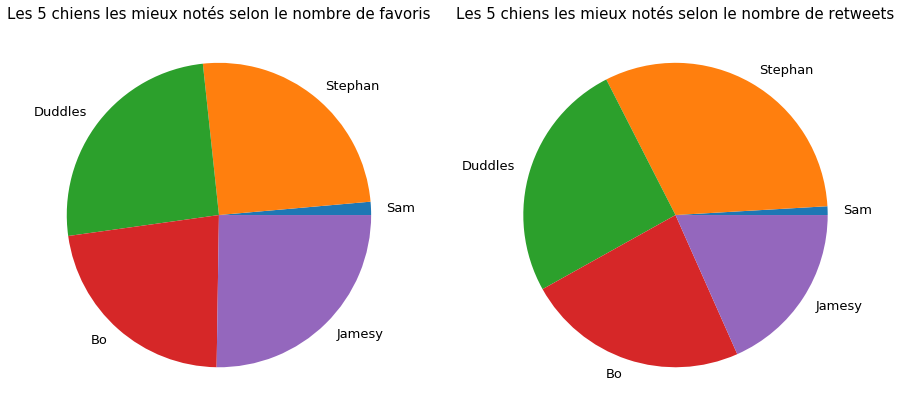

In [110]:
plt.figure()
fig, axes = plt.subplots(ncols=2, figsize = (15,7))
archive_clean.loc[best_scores_inds][:5].set_index('name').favorite_count.plot(kind='pie', legend=False, fontsize=13, ax = axes[0])#.legend(loc='center')
archive_clean.loc[best_scores_inds][:5].set_index('name').retweet_count.plot(kind='pie', legend=False, fontsize=13, ax =axes[1])#.legend(loc='center')
axes[0].set_title('Les 5 chiens les mieux notés selon le nombre de favoris', fontsize=15) #title.set_size(13)
axes[1].set_title('Les 5 chiens les mieux notés selon le nombre de retweets', fontsize=15)
axes[0].set_ylabel('')
axes[1].set_ylabel('')
plt.show();